### 1. XOR in Keras

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Softmax, Lambda, Concatenate, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

In [8]:
X = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=float)
y = np.array([[0], [1], [1], [0]], dtype=float)

In [ ]:
model = Sequential([
    Dense(2, activation='sigmoid', input_shape=(2,)),   # hidden layer
    Dense(1, activation='sigmoid')                      # output layer
])

model.compile(optimizer=SGD(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=10000, verbose=0)

print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.02153278]
 [0.9803699 ]
 [0.9716499 ]
 [0.018077  ]]


In [19]:
for layer in model.layers:
    print(layer.name, layer.get_weights())

dense_2 [array([[-5.7858863, -5.7803044],
       [ 5.548496 ,  6.009332 ]], dtype=float32), array([-2.9952366,  2.9074185], dtype=float32)]
dense_3 [array([[ 9.2906065],
       [-8.709011 ]], dtype=float32), array([3.998959], dtype=float32)]


One hidden layer of at least two sigmoid neurons can return XOR. Network trains and returns ~[0,1,1,0].

Different weight initialisations lead to different final params because XOR is non-linear problem, network is small, gradient descent on sigmoid activations has multiple minima, XOR can be represented in multiple ways.

But can still represent XOR for 2-neuron sigmoid layer.

### 2. Neural network for regression

In [ ]:
def f(x, y):
    return -((x*(x-1)) + (y*(1-y))) + 0.5*np.cos(x*y)*np.sin((2*x) + y)

def gen_data(samples=5000):
    x = np.random.uniform(-3, 3, size=samples)
    y = np.random.uniform(-3, 3, size=samples)
    
    X_train = np.vstack([x, y]).T
    z = f(x, y)
    
    return X_train, z

In [77]:
X_train, y_train = gen_data(5000)

model = Sequential([
    Dense(64, activation='tanh', input_shape=(2,)),
    Dense(64, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mse')

In [78]:
model.fit(X_train, y_train, epochs=50, verbose=2)

Epoch 1/50
157/157 - 0s - 2ms/step - loss: 13.7780
Epoch 2/50
157/157 - 0s - 520us/step - loss: 7.2851
Epoch 3/50
157/157 - 0s - 537us/step - loss: 2.1154
Epoch 4/50
157/157 - 0s - 629us/step - loss: 1.0239
Epoch 5/50
157/157 - 0s - 588us/step - loss: 0.5461
Epoch 6/50
157/157 - 0s - 618us/step - loss: 0.2796
Epoch 7/50
157/157 - 0s - 699us/step - loss: 0.1517
Epoch 8/50
157/157 - 0s - 557us/step - loss: 0.1017
Epoch 9/50
157/157 - 0s - 523us/step - loss: 0.0809
Epoch 10/50
157/157 - 0s - 523us/step - loss: 0.0685
Epoch 11/50
157/157 - 0s - 502us/step - loss: 0.0603
Epoch 12/50
157/157 - 0s - 516us/step - loss: 0.0566
Epoch 13/50
157/157 - 0s - 520us/step - loss: 0.0530
Epoch 14/50
157/157 - 0s - 528us/step - loss: 0.0509
Epoch 15/50
157/157 - 0s - 604us/step - loss: 0.0494
Epoch 16/50
157/157 - 0s - 585us/step - loss: 0.0482
Epoch 17/50
157/157 - 0s - 518us/step - loss: 0.0441
Epoch 18/50
157/157 - 0s - 527us/step - loss: 0.0448
Epoch 19/50
157/157 - 0s - 567us/step - loss: 0.0434
Epo

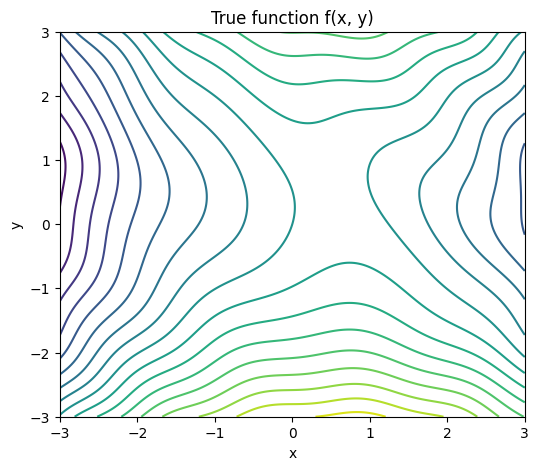

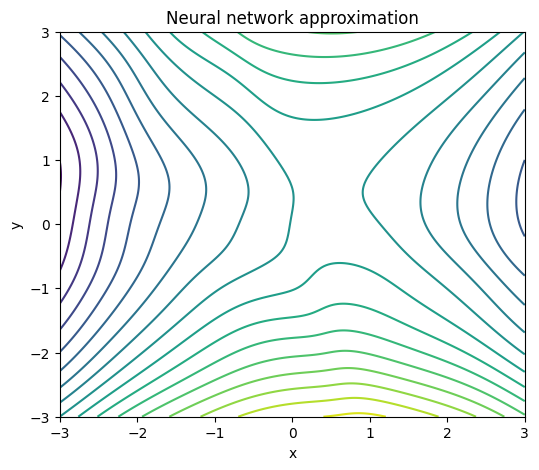

In [80]:
import matplotlib.pyplot as plt

N = 200
xs = np.linspace(-3, 3, N)
ys = np.linspace(-3, 3, N)
X, Y = np.meshgrid(xs, ys)

XY_grid = np.stack([X.ravel(), Y.ravel()], axis=1)
Z_pred = model.predict(XY_grid, verbose=0).reshape(N, N)
Z_true = f(X, Y)

plt.figure(figsize=(6,5))
plt.contour(X, Y, Z_true, levels=20)
plt.title("True function f(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure(figsize=(6,5))
plt.contour(X, Y, Z_pred, levels=20)
plt.title("Neural network approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [81]:
def gen_aug_data(samples=5000):
    x = np.random.uniform(-3, 3, size=samples)
    y = np.random.uniform(-3, 3, size=samples)
    
    X_aug = np.vstack([x, y, x**2, x*y, y**2]).T
    z = f(x, y)

    return X_aug, z

In [84]:
X_train_aug, y_train = gen_aug_data(samples=5000)

model_aug = Sequential([
    Dense(64, activation='tanh', input_shape=(5,)),
    Dense(64, activation='tanh'),
    Dense(1)
])

model_aug.compile(optimizer='adam', loss='mse')
model_aug.fit(X_train_aug, y_train, epochs=50, verbose=2)

Epoch 1/50


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 - 0s - 3ms/step - loss: 3.3274
Epoch 2/50
157/157 - 0s - 578us/step - loss: 0.6090
Epoch 3/50
157/157 - 0s - 558us/step - loss: 0.2345
Epoch 4/50
157/157 - 0s - 524us/step - loss: 0.1091
Epoch 5/50
157/157 - 0s - 626us/step - loss: 0.0726
Epoch 6/50
157/157 - 0s - 637us/step - loss: 0.0572
Epoch 7/50
157/157 - 0s - 548us/step - loss: 0.0471
Epoch 8/50
157/157 - 0s - 518us/step - loss: 0.0405
Epoch 9/50
157/157 - 0s - 527us/step - loss: 0.0379
Epoch 10/50
157/157 - 0s - 529us/step - loss: 0.0368
Epoch 11/50
157/157 - 0s - 521us/step - loss: 0.0316
Epoch 12/50
157/157 - 0s - 525us/step - loss: 0.0325
Epoch 13/50
157/157 - 0s - 516us/step - loss: 0.0312
Epoch 14/50
157/157 - 0s - 523us/step - loss: 0.0284
Epoch 15/50
157/157 - 0s - 669us/step - loss: 0.0278
Epoch 16/50
157/157 - 0s - 657us/step - loss: 0.0302
Epoch 17/50
157/157 - 0s - 564us/step - loss: 0.0296
Epoch 18/50
157/157 - 0s - 582us/step - loss: 0.0299
Epoch 19/50
157/157 - 0s - 696us/step - loss: 0.0272
Epoch 20/50
157

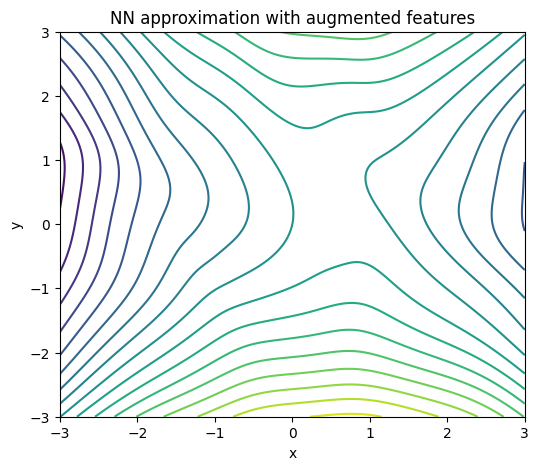

In [ ]:
N = 200
xs = np.linspace(-3, 3, N)
ys = np.linspace(-3, 3, N)
X_grid, Y_grid = np.meshgrid(xs, ys)

XY_aug_grid = np.stack([X_grid.ravel(), Y_grid.ravel(),
                        X_grid.ravel()**2,
                        X_grid.ravel()*Y_grid.ravel(),
                        Y_grid.ravel()**2], axis=1)
Z_pred_aug = model_aug.predict(XY_aug_grid, verbose=0).reshape(N, N)
Z_true = f(X_grid, Y_grid)

plt.figure(figsize=(6,5))
plt.contour(X_grid, Y_grid, Z_pred_aug, levels=20)
plt.title("NN approximation with augmented features")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Performance has improved -> target function has quadratic component therefore the network doesnt need to learn quadratic relationship after the augmented features are added.

In [92]:
model_lambda = Sequential([
    Dense(64, activation='tanh', input_shape=(5,)),
    Lambda(lambda x: tf.math.sin(x)),
    Dense(64, activation='tanh'),
    Lambda(lambda x: tf.math.sin(x)),
    Dense(1)
])

model_lambda.compile(optimizer='adam', loss='mse')
model_lambda.fit(X_train_aug, y_train, epochs=50, verbose=2)

Epoch 1/50


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 - 0s - 3ms/step - loss: 3.5200
Epoch 2/50
157/157 - 0s - 527us/step - loss: 0.6692
Epoch 3/50
157/157 - 0s - 514us/step - loss: 0.2470
Epoch 4/50
157/157 - 0s - 582us/step - loss: 0.1074
Epoch 5/50
157/157 - 0s - 579us/step - loss: 0.0697
Epoch 6/50
157/157 - 0s - 513us/step - loss: 0.0520
Epoch 7/50
157/157 - 0s - 523us/step - loss: 0.0447
Epoch 8/50
157/157 - 0s - 555us/step - loss: 0.0384
Epoch 9/50
157/157 - 0s - 656us/step - loss: 0.0352
Epoch 10/50
157/157 - 0s - 613us/step - loss: 0.0334
Epoch 11/50
157/157 - 0s - 672us/step - loss: 0.0324
Epoch 12/50
157/157 - 0s - 681us/step - loss: 0.0293
Epoch 13/50
157/157 - 0s - 552us/step - loss: 0.0286
Epoch 14/50
157/157 - 0s - 530us/step - loss: 0.0272
Epoch 15/50
157/157 - 0s - 546us/step - loss: 0.0262
Epoch 16/50
157/157 - 0s - 536us/step - loss: 0.0239
Epoch 17/50
157/157 - 0s - 521us/step - loss: 0.0253
Epoch 18/50
157/157 - 0s - 514us/step - loss: 0.0234
Epoch 19/50
157/157 - 0s - 515us/step - loss: 0.0224
Epoch 20/50
157

In [96]:
inputs = Input(shape=(5,))
b1 = Dense(32)(inputs)
b2 = Dense(32)(inputs)
b2 = Lambda(lambda x: tf.math.sin(x))(b2)
b3 = Dense(32)(inputs)
b2 = Lambda(lambda x: tf.math.cos(x))(b3)
concat = Concatenate()([b1, b2, b3])
hidden = Dense(64, activation='tanh')(concat)
output = Dense(1)(hidden)
model_final = Model(inputs=inputs, outputs=output)

model_final.compile(optimizer='adam', loss='mse')
model_final.fit(X_train_aug, y_train, epochs=50, verbose=2)

Epoch 1/50
157/157 - 0s - 3ms/step - loss: 1.8298
Epoch 2/50
157/157 - 0s - 587us/step - loss: 0.1373
Epoch 3/50
157/157 - 0s - 574us/step - loss: 0.0609
Epoch 4/50
157/157 - 0s - 576us/step - loss: 0.0382
Epoch 5/50
157/157 - 0s - 575us/step - loss: 0.0301
Epoch 6/50
157/157 - 0s - 569us/step - loss: 0.0237
Epoch 7/50
157/157 - 0s - 578us/step - loss: 0.0205
Epoch 8/50
157/157 - 0s - 588us/step - loss: 0.0162
Epoch 9/50
157/157 - 0s - 575us/step - loss: 0.0128
Epoch 10/50
157/157 - 0s - 579us/step - loss: 0.0102
Epoch 11/50
157/157 - 0s - 581us/step - loss: 0.0083
Epoch 12/50
157/157 - 0s - 583us/step - loss: 0.0071
Epoch 13/50
157/157 - 0s - 600us/step - loss: 0.0061
Epoch 14/50
157/157 - 0s - 576us/step - loss: 0.0066
Epoch 15/50
157/157 - 0s - 570us/step - loss: 0.0045
Epoch 16/50
157/157 - 0s - 571us/step - loss: 0.0039
Epoch 17/50
157/157 - 0s - 550us/step - loss: 0.0035
Epoch 18/50
157/157 - 0s - 561us/step - loss: 0.0030
Epoch 19/50
157/157 - 0s - 560us/step - loss: 0.0031
Epoc

### FashionMNIST

In [ ]:
fashion = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

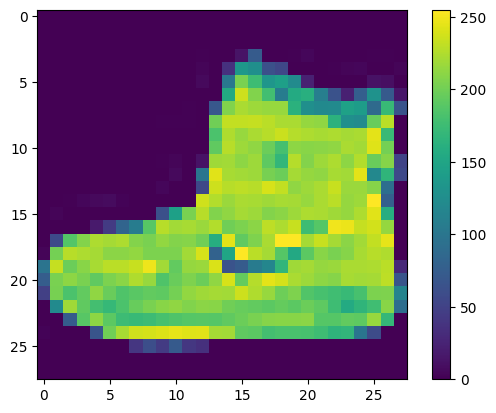

In [40]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [41]:
# normalising
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

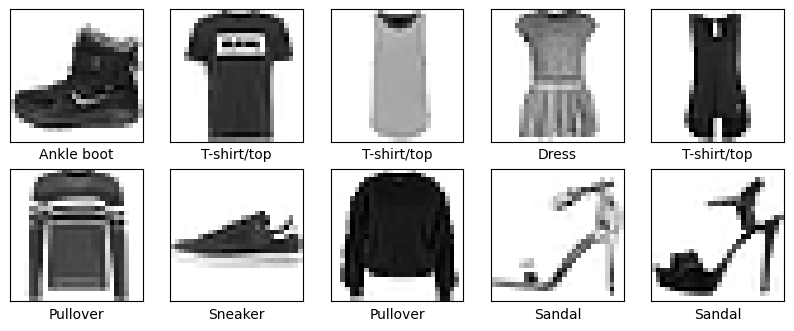

In [44]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_norm[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10)
])

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
model.fit(x_train_norm, y_train, epochs=20, verbose=2)

Epoch 1/20
1875/1875 - 3s - 1ms/step - accuracy: 0.8250 - loss: 0.4853
Epoch 2/20
1875/1875 - 2s - 1ms/step - accuracy: 0.8649 - loss: 0.3663
Epoch 3/20
1875/1875 - 2s - 1ms/step - accuracy: 0.8794 - loss: 0.3272
Epoch 4/20
1875/1875 - 2s - 1ms/step - accuracy: 0.8875 - loss: 0.3057
Epoch 5/20
1875/1875 - 2s - 1ms/step - accuracy: 0.8933 - loss: 0.2864
Epoch 6/20
1875/1875 - 2s - 1ms/step - accuracy: 0.8972 - loss: 0.2742
Epoch 7/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9028 - loss: 0.2584
Epoch 8/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9052 - loss: 0.2507
Epoch 9/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9086 - loss: 0.2404
Epoch 10/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9113 - loss: 0.2316
Epoch 11/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9147 - loss: 0.2228
Epoch 12/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9181 - loss: 0.2154
Epoch 13/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9199 - loss: 0.2091
Epoch 14/20
1875/1875 - 2s - 1ms/step - accuracy: 0.9234 - loss: 0.2016
E

In [67]:
test_loss, test_acc = model.evaluate(x_test_norm,  y_test, verbose=2)

313/313 - 0s - 804us/step - accuracy: 0.8898 - loss: 0.3797


In [69]:
prob_model = Sequential([model,
                         Softmax()])

predictions = prob_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


In [70]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

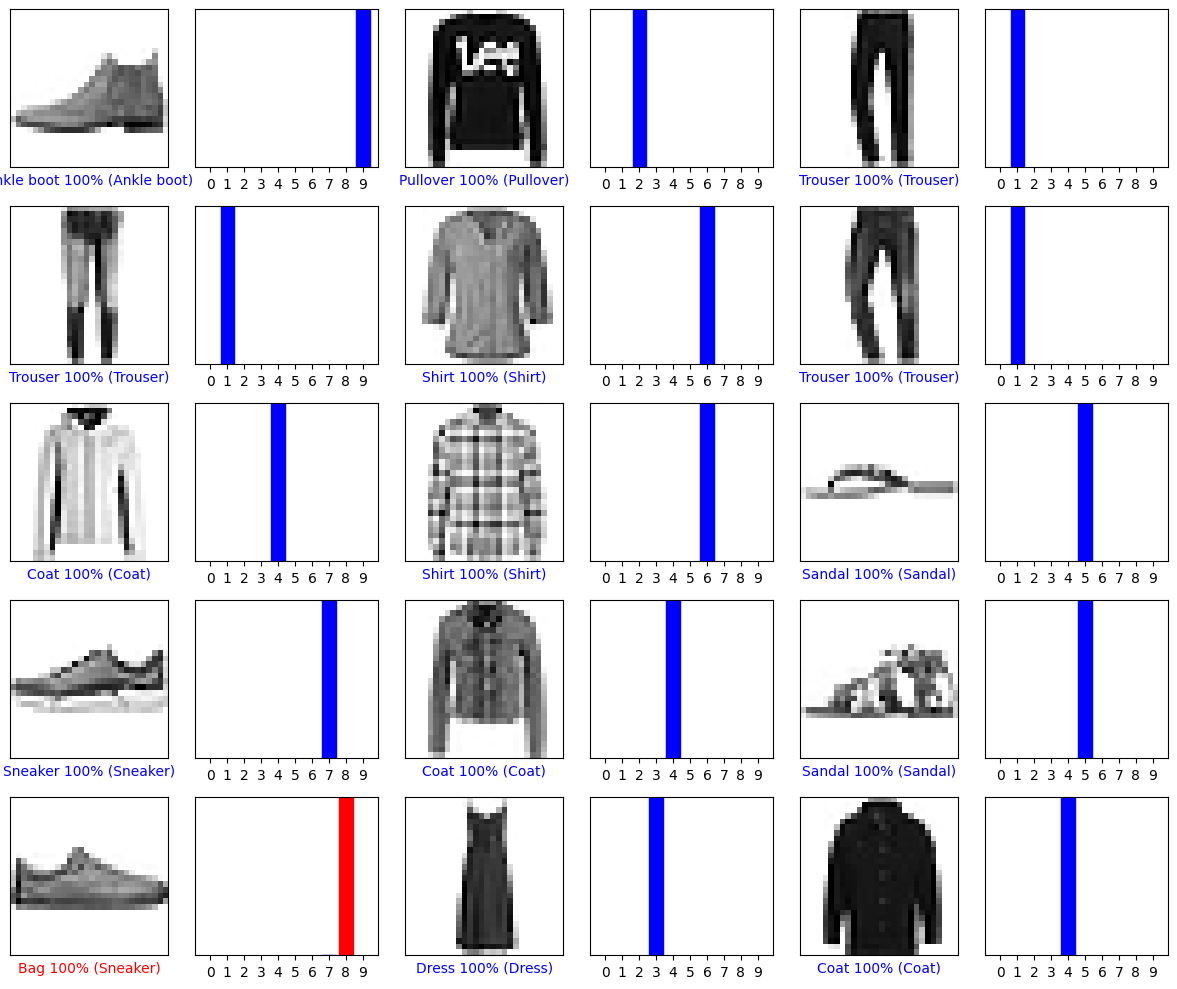

In [71]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()